<a href="https://colab.research.google.com/github/mahmud-nobe/Physics_Simulation_Tutorial/blob/main/N_body_simulation/N_body_Simulation_and_energy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-body Simulation
## Simulation Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67e-11
AU = 1.49e11

In [ ]:
class Body:
    '''
    Initializing class. The attributes are:
        - mass (float): mass of the body, in kg
        - color (str): color from matplotlib.pyplot color scheme
        - size (int): matplotlib.pyplot size of represented body
        - vel (float): magnitude of initial velocity of the body
        - vel_direction (float): direction of initial velocity of body, in degrees
        - init_position (tuple): initial position of the body on the system. Tuple with x and y coordinates
        - acceleration: None, to be computed in code
        - next_position: None, to be computed in code

    '''
    def __init__(self, mass = 1, vel = 0, vel_direction = 0, init_position = (0,0), color = 'blue', size = 15):
        self.color              = color
        self.size               = size
        self.mass               = mass

        self.vel                = vel
        self.vel_direction      = np.deg2rad(vel_direction)   #converts direction to radians
        self.velocity           = self.decomposeVelocity()
        
        self.position           = init_position
        self.acceleration       = None
        self.next_position      = None     
        
    '''
    Function that decomposes velocity vector into vector components
    '''    
    def decomposeVelocity(self):
        if self.vel_direction != None:
            vx = self.vel * np.cos(self.vel_direction)  # compute x component of velocity vector
            vy = self.vel * np.sin(self.vel_direction)  # compute y component of velocoty vector
            return vx, vy                               # return x and y components
          
    def get_distance(self, other):
        dx = other.position[0] - self.position[0]              # distance in x axis
        dy = other.position[1] - self.position[1]              # distance in y axis

        return dx, dy

    
    '''
    Function that computes the acceleration between two bodies. 
    It takes a second body as input, where the first body is self.
    '''    
    def accBetweenTwoBodies(self, other):
        G = 6.67e-11                                             # gravitational constant
        m1, m2 = self.mass, other.mass                           # define masses of bodies 1 and 2
        dx, dy = self.get_distance(other)
        
        r = np.sqrt((dx)**2 + (dy)**2)                   # compute distance between the two bodies
        
        if r == 0: acc = 0
        else: acc = (m2*G) / r**2                          # compute acc acting on body 1
        
        direction = np.arctan2(dy, dx)                    
        
        ax = acc * np.cos(direction)                             # decompose acc into x component
        ay = acc * np.sin(direction)                            # decompose acc into y component
        return ax, ay                                           # return force components
     
    

In [ ]:
class System:
    def __init__(self, bodies, time_step):
        self.bodies             = bodies
        self.time_step          = time_step
        self.times              = [0]
        self.energies           = [self.get_energy()]

    '''
    Function that calculates the total energy of the system
    '''
    def get_energy(self):
        KE = 0
        PE = 0
        G = 6.67e-11
        for i in range(len(self.bodies)):
            body = self.bodies[i]

            vx, vy = body.velocity
            m = body.mass
            v = np.sqrt(vx**2 + vy**2)

            KE += 0.5 * m * v**2

            for j in range(i+1, len(self.bodies)):
                body1, body2 = self.bodies[i], self.bodies[j]
                mi, mj = body1.mass, body2.mass
                dx, dy = body1.get_distance(body2)
                dist = np.sqrt(dx**2 + dy**2)

                PE += -G * mi * mj / dist
        
        energy = KE + PE
        return energy

    def get_acceleration(self):
        for body in self.bodies:

            net_ax = sum([body.accBetweenTwoBodies(other_body)[0] for other_body in self.bodies])
            net_ay = sum([body.accBetweenTwoBodies(other_body)[1] for other_body in self.bodies])
        
            body.acceleration = net_ax, net_ay

    '''
    This function updates the position of all the bodies using their 
    accelerations, current velocities, and time steps
    ''' 
    def updatePosition(self):
        for body in self.bodies:
            x, y   = body.position                           # set positions, velocities, and acceleration components to variables
            ax, ay = body.acceleration                              
            vx, vy = body.velocity
            t      = self.time_step
            
            newX = x + vx*t + 1/2*ax*(t**2)                         # set new x and y positions based on kinematics formula
            newY = y + vy*t + 1/2*ay*(t**2)
            body.next_position = (newX, newY) 

    '''
    This function updates the velocity of all the bodies using their 
    accelerations, and time steps
    ''' 
    def updateVelocity(self):
        for body in self.bodies:
            vx, vy = body.velocity
            ax, ay = body.acceleration
            t      = self.time_step
            
            newVx = vx + ax*t
            newVy = vy + ay*t
            
            body.velocity = newVx, newVy 
    
    def update(self):
        self.get_acceleration()
        self.updatePosition()
        self.updateVelocity()

        for body in self.bodies:
            body.position = body.next_position

        time_next = self.times[-1] + self.time_step
        self.times.append(time_next)

        energy = self.get_energy()
        self.energies.append(energy)
            
        

        

## Scenario 1

In [ ]:
scale = 3e9
G = 6.67e-11 
m1 =  5.9742*10**24
m2 =  5.9742*10**25
v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

b1 = Body(init_position = (1*scale,0), mass = m1, vel = v_rel*(m2/(m1+m2)), vel_direction = 90, color = 'r', size=15)
b2 = Body(init_position = (-0.1*scale,0), mass = m2, vel = v_rel*(m1/(m1+m2)), vel_direction = -90, color = 'orange', size=15)

bodies = [b1, b2]


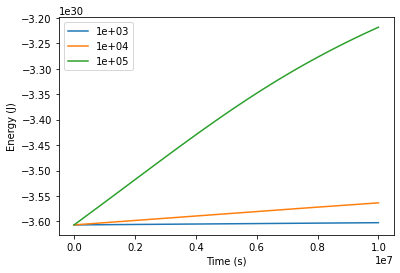

In [ ]:
t_steps = [1e3, 1e4, 1e5]
end_time = 1e7

for t_step in t_steps:

    v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

    b1 = Body(init_position = (1*scale,0), mass = m1, vel = v_rel*(m2/(m1+m2)), vel_direction = 90, color = 'r', size=15)
    b2 = Body(init_position = (-0.1*scale,0), mass = m2, vel = v_rel*(m1/(m1+m2)), vel_direction = -90, color = 'orange', size=15)

    bodies = [b1, b2]
    
    system = System(bodies, time_step=t_step)
    N_step = int(end_time / t_step)
    for _ in range(N_step):
        system.update()
    plt.plot(system.times, system.energies, label = '{:.0e}'.format(t_step))

plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.show()

Progress:  50


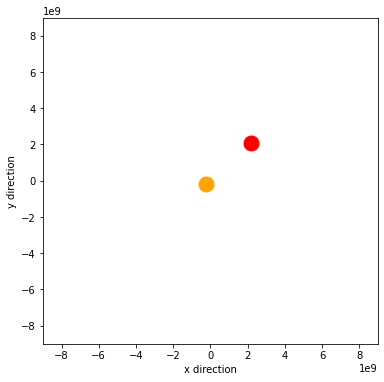

In [ ]:
## Animation code from the study guide

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
#For displaying animations inside the jupyter notebook
%matplotlib inline 

def animate(i, system, lines):
    #Run 200 update steps between each frame.
		#Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)
#system.display()


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 100)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 50, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")

HTML(ani.to_html5_video())

#ani.save("OrbitSimulation.gif")
#print("Done")

#plt.show()

## Scenario 2

In [ ]:
scale = 1.79e9
pos = np.asarray((-0.97000436*scale, 0.24308753*scale))
m1 =  5.9742*10**24
v = 297.83
v_d = 42.843398292913164

b1 = Body(init_position = pos, mass = m1, vel = v, vel_direction = v_d, color = 'r', size = 15)
b2 = Body(init_position = -pos, mass = m1, vel = v, vel_direction = v_d, color = 'g', size = 15)
b3 = Body(init_position = (0,0), mass = m1, vel = 2*v, vel_direction = v_d-180, color = 'b', size = 15)

bodies = [b1, b2, b3]


#t_step = 1e-3
#system = System(bodies, time_step=t_step)

#system.display()

#for i in range(1000000):
#    system.update()
#    if i%100000 == 0:
#        system.display()
        

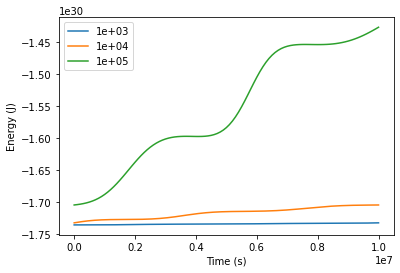

In [ ]:
t_steps = [1e3, 1e4, 1e5]
end_time = 1e7

for t_step in t_steps:
    system = System(bodies, time_step=t_step)
    N_step = int(end_time / t_step)
    for _ in range(N_step):
        system.update()
    plt.plot(system.times, system.energies, label = '{:.0e}'.format(t_step))

plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.show()

Progress:  150


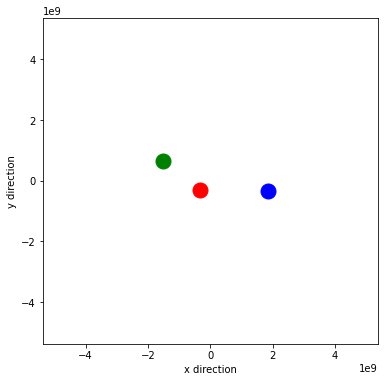

In [ ]:
## Animation code from the study guide

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
#For displaying animations inside the jupyter notebook
%matplotlib inline 

def animate(i, system, lines):
    #Run 200 update steps between each frame.
		#Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)
#system.display()


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 200)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 50, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")

HTML(ani.to_html5_video())

#ani.save("OrbitSimulation.gif")
#print("Done")

#plt.show()

## Scenario 3

In [ ]:
scale = 1.49e11

Sun     = Body(init_position = (0,0), 
               vel = 0, 
               vel_direction = 0)

Earth   = Body(init_position = (-1*scale,0),
                vel = 29.783*1000,
                vel_direction = 90)

Venus   = Body(init_position = (0.723*scale, 0),
                vel = 35.02*1000,
                vel_direction = 270)

Mars    = Body(init_position = (-1.52*scale, 0),
                vel = 24*1000,
                vel_direction = 90)


Sun.mass    = 1.98892e30
Sun.color   = 'orange'
Sun.size    = 30
    
Earth.mass  = 5.9742 * 10 ** 24
Earth.color = 'b'
Earth.size  = 8
    
Venus.mass  = 4.8685 * 10 ** 24
Venus.color = 'y'
Venus.size  = 9
   
Mars.mass   = 6.39 * 10 ** 23
Mars.color  = 'r'
Mars.size   = 6


bodies = [Sun, Earth, Venus, Mars]

In [ ]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

Progress:  150


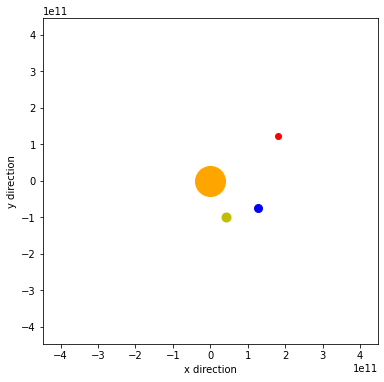

In [ ]:
## Animation code from the study guide

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
#For displaying animations inside the jupyter notebook
%matplotlib inline 

def animate(i, system, lines):
    #Run 200 update steps between each frame.
		#Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)
#system.display()


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 200)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 50, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")

HTML(ani.to_html5_video())

#ani.save("OrbitSimulation.gif")
#print("Done")

#plt.show()

[-3.6069607245272735e+30]
[-3.6069607245272735e+30]
[-3.6069607245272735e+30]


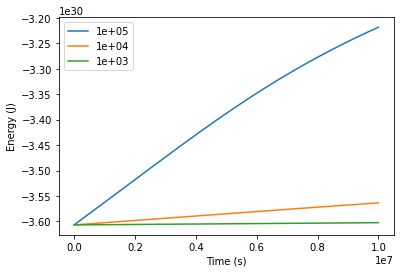

In [ ]:
t_steps = [1e5, 1e4, 1e3]
end_time = 1e7

for t_step in t_steps:
    v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

    b1 = Body(init_position = (1*scale,0), mass = m1, vel = v_rel*(m2/(m1+m2)), vel_direction = 90, color = 'r', size=15)
    b2 = Body(init_position = (-0.1*scale,0), mass = m2, vel = v_rel*(m1/(m1+m2)), vel_direction = -90, color = 'orange', size=15)

    bodies = [b1, b2]

    system = System(bodies, time_step=t_step)
    print(system.energies)
    N_step = int(end_time / t_step)
    for _ in range(N_step):
        system.update()
    plt.plot(system.times, system.energies, label = '{:.0e}'.format(t_step))

plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.show()

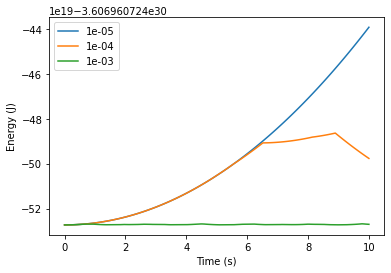

In [ ]:
t_steps = [1e-3, 1e-2, 1e-1]
end_time = 1e1

for t_step in t_steps:
    v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

    b1 = Body(init_position = (1*scale,0), mass = m1, vel = v_rel*(m2/(m1+m2)), vel_direction = 90, color = 'r', size=15)
    b2 = Body(init_position = (-0.1*scale,0), mass = m2, vel = v_rel*(m1/(m1+m2)), vel_direction = -90, color = 'orange', size=15)

    bodies = [b1, b2]

    system = System(bodies, time_step=t_step)
    N_step = int(end_time / t_step)
    for _ in range(N_step):
        system.update()
    plt.plot(system.times, system.energies, label = '{:.0e}'.format(t_step))

plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.show()

# Earth-Like Planet

In [ ]:
#Scenario for Earth-like planet around Sun-like star
scale = 1.495e11 #1 AU
G = 6.67e-11 #Universal gravitational constant
m_e =  5.9742e24 #Mass of Earth
m_s =  1.989e30 #Mass of the Sun

#ADJUST THIS!
r_rel = 1*scale #Distance between centers in AU



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

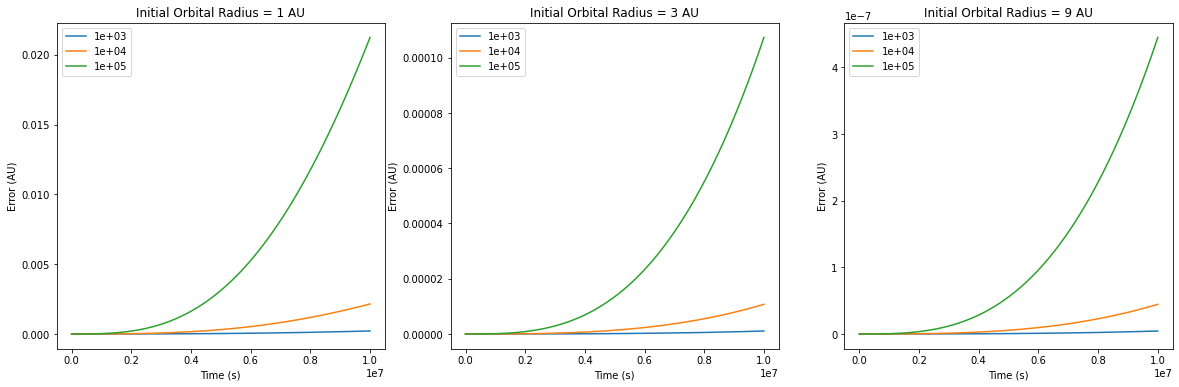

In [ ]:
plt.figure(figsize = (20,6))

t_steps = [1e3, 1e4, 1e5]
end_time = 1e7

orbit_scales = [1, 3, 9]

for i in range(len(orbit_scales)):
    r_rel = orbit_scales[i] * scale         # Distance between centers in AU

    for t_step in t_steps:

        #Calculations for circular orbits
        r_e = r_rel*(m_s/(m_e+m_s)) #Radius of Earth's orbit
        r_s = r_rel*(m_e/(m_e+m_s)) #Radius of the Sun's orbit
        v_rel = np.sqrt(G*(m_e+m_s)/(r_rel)) #Summed velocities

        init_dist = r_e + r_s

        earth = Body(init_position = (r_e, 0),  mass = m_e, vel = v_rel*(m_s/(m_e+m_s)), vel_direction = 90,  color = 'r')
        sun   = Body(init_position = (-r_s, 0), mass = m_s, vel = v_rel*(m_e/(m_e+m_s)), vel_direction = -90, color = 'orange')

        bodies = [sun, earth]

        system = System(bodies, time_step=t_step)
        radius = [init_dist]
        error = [0]

        N_step = int(end_time / t_step)
        for _ in range(N_step):
            system.update()
            dx, dy = earth.get_distance(sun)
            dist = np.sqrt(dx**2 + dy**2)
            radius.append(dist)
            error.append(dist - init_dist)

        radius = np.array(radius)
        error = np.array(error)
        
        plt.subplot(1,3,i+1)
        plt.plot(system.times, error/scale, label = '{:.0e}'.format(t_step))
        plt.ylabel('Error (AU)')
        plt.xlabel('Time (s)')
        plt.title('Initial Orbital Radius = {} AU'.format(orbit_scales[i]))
        plt.legend()

plt.show()

We can see that when the initial radius is higher, then the change in radius is smaller with the same step size and same interval. 

Also in the energy plot, we saw that the energy were increasing with time. This is because in forward Euler method, we always predict the next position with a positive error, so it overshoots in every step. That's why the distance between the objects increases and their potential energy increase. And for smaller step_size that deviation become smaller.

When two objects are very close, then the error is also relatively become higher, this is why for smaller radius we can see more deviation.
